# Homework 7 Solutions
First part is just looking at units. dn/dt has units of photons/second. So we know $k$ has units of seconds^-1.

$N_0$ is a number of atoms the pump can excite so it has units atoms. 

That means $G$ has to have units (atoms*sec)^-1.

$\alpha$ has to have units of atoms/photon 

In [1]:
%cd '/home/cody/Physics 331/331 Homework (Cody)/HW 7 Laser Threshold'
%ls

/home/cody/Physics 331/331 Homework (Cody)/HW 7 Laser Threshold
 dndt.py                      'HW 7 Laser Threshold.pdf'
'Homework 7 Solutions.ipynb'  'HW 7 Laser Threshold.synctex.gz'
'HW 7 Laser Stuff.ipynb'      'HW 7 Laser Threshold.tex'
'HW 7 Laser Threshold.aux'     rk2_1d.py
'HW 7 Laser Threshold.log'


In [2]:
# %load rk2_1d
import numpy as np
def rk2_1d(y0, t0, tf, dt, deriv_func):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """
    t = np.arange(t0, tf+dt, dt)#Array of all the times we want
    n_steps = len(t)            #Number of steps to get to tf

    y  = np.zeros(n_steps)      #Empty array I want to put answers into
    y[0] = y0                   #Initial condition
    for n in range(n_steps-1):
        #Take a half step
        f = deriv_func(y[n],t[n])
        y_star = y[n] + 0.5 * dt * f

        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1] = (y[n] + dt*f_star)

    return t, y


In [3]:
# %load dndt
def dndt(n,t):
    """
    Differential for the number of photons in a solid state laser

    Inputs
    ----------
    n:  Dependent variable (numer of photons)
    t:  Independed variable (time sec)

    Output
    ----------
    dndt
    """

    G = 0.2028      #Gain coefficent (1/(atom*s))
    alpha = 20.28   #decay rate of excited atoms (atom/photon)
    k = 2.018e10    # 1/ life time of a photon (1/s)
    return (G*N0 - k)*n - (alpha*G)*n**2


In [11]:
N0 = 0.9e11
t, n = rk2_1d(1e5,0, 1e-8, 1e-10, dndt)
N0 = 1e11
t2, n2 = rk2_1d(1e5,0, 1e-8, 1e-10, dndt)
N0 = 1.1e11
t3, n3 = rk2_1d(1e5,0, 1e-8, 1e-10, dndt)

I know this is bad coding practice having N0 defined outside of the function, but I would have to write 3 different dndt functions one for each pump strength. I'm lazy and don't want to do that.

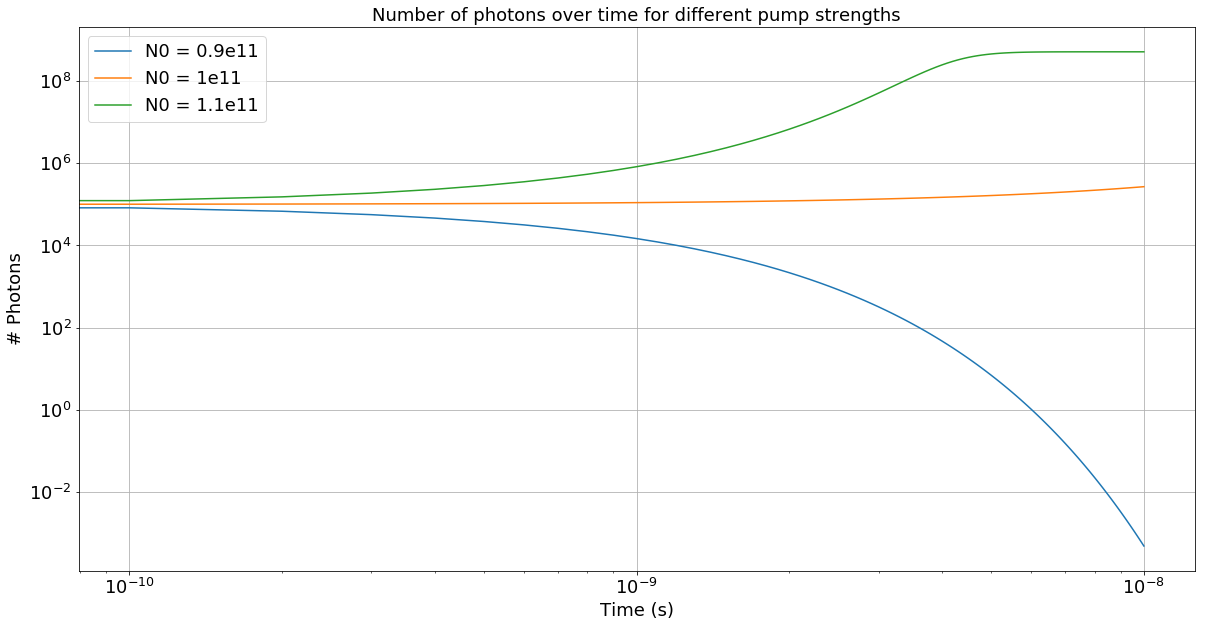

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(t,n, label = 'N0 = 0.9e11')
plt.plot(t2,n2, label = 'N0 = 1e11')
plt.plot(t3,n3, label = 'N0 = 1.1e11')

plt.yscale('log')
plt.xscale('log')

plt.title('Number of photons over time for different pump strengths', size = 18)
plt.xlabel('Time (s)', size = 18)
plt.ylabel('# Photons', size = 18)

plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid()
plt.legend(prop={'size':18})

plt.show()

The unphysical photons are non-integer number of photons. Any line that goes bellow $10^0$ is nonphysical because you can't have fractions of photons

Now I want to make multiple plots with the same strength but with different initial conditions,

In [6]:
N0 = 0.9e11
t, n = rk2_1d(1,0, 1e-7, 1e-12, dndt)
t2, n2 = rk2_1d(1e3,0, 1e-7, 1e-12, dndt)
t3, n3 = rk2_1d(1e10,0, 1e-7, 1e-12, dndt)

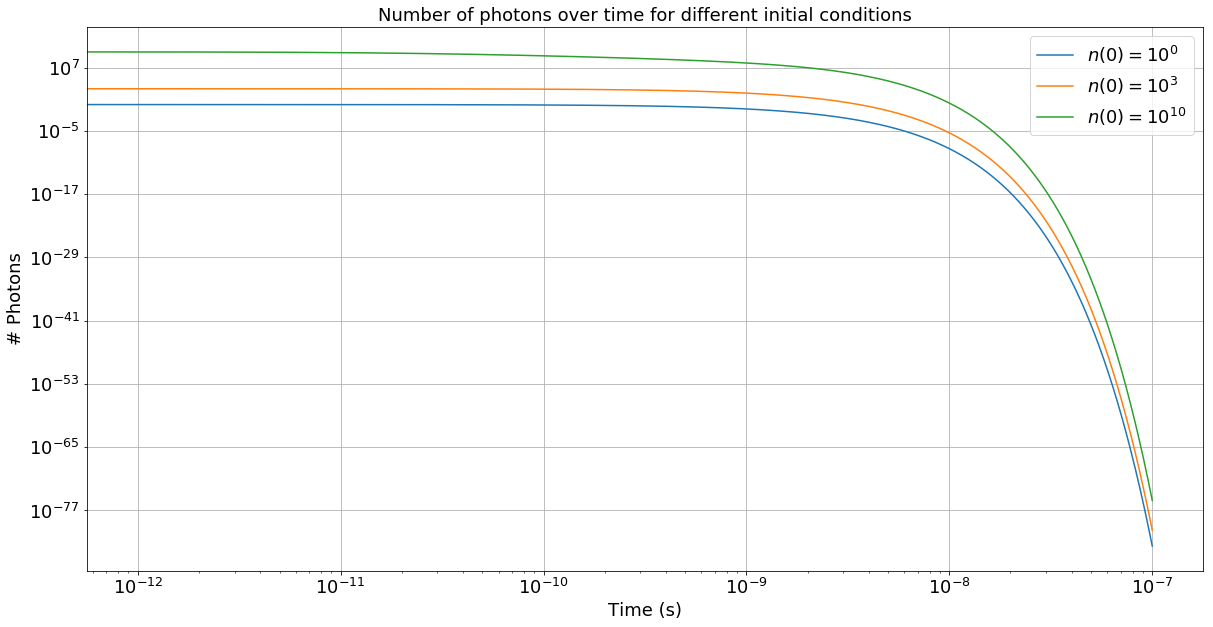

In [7]:
plt.figure(figsize = (20,10))
plt.plot(t,n, label = '$n(0) = 10^0$')
plt.plot(t2,n2, label = '$n(0) = 10^3$')
plt.plot(t3,n3, label = '$n(0) = 10^{10}$')

plt.yscale('log')
plt.xscale('log')

plt.title('Number of photons over time for different initial conditions', size = 18)
plt.xlabel('Time (s)', size = 18)
plt.ylabel('# Photons', size = 18)

plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid()
plt.legend(prop={'size':18})

plt.show()

Doing the same thing but with a pump strenght of $10^{11}$

In [8]:
N0 = 1e11
t, n = rk2_1d(1,0, 1e-6, 1e-12, dndt)
t2, n2 = rk2_1d(1e3,0, 1e-6, 1e-12, dndt)
t3, n3 = rk2_1d(1e10,0, 1e-6, 1e-12, dndt)

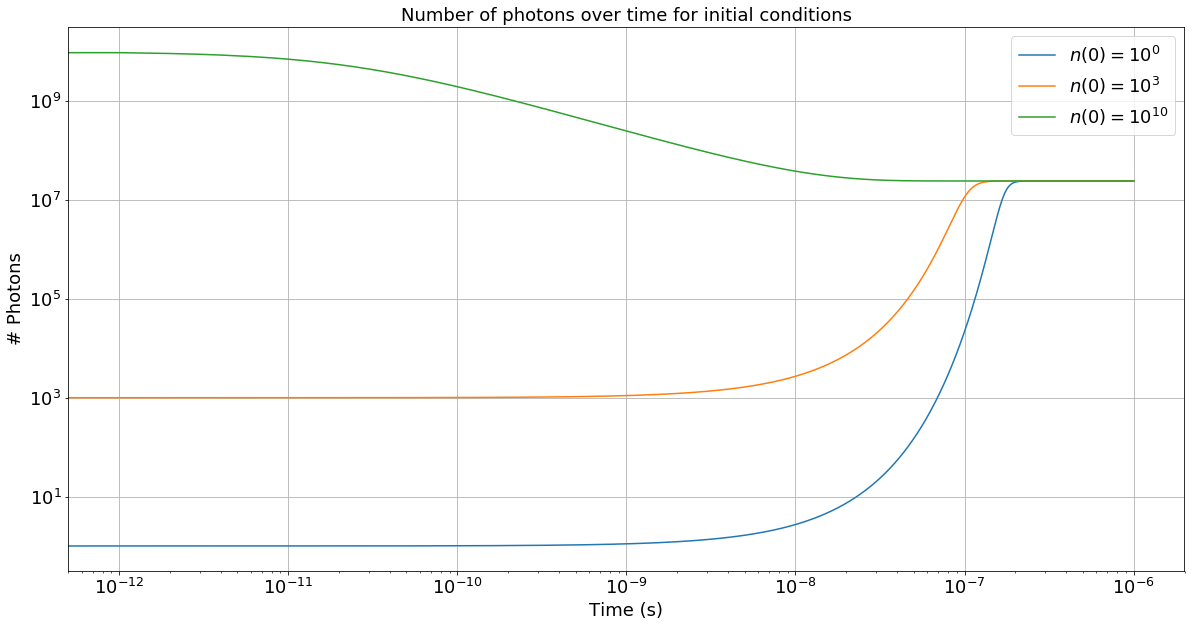

In [9]:
plt.figure(figsize = (20,10))
plt.plot(t,n, label = '$n(0) = 10^0$')
plt.plot(t2,n2, label = '$n(0) = 10^3$')
plt.plot(t3,n3, label = '$n(0) = 10^{10}$')

plt.yscale('log')
plt.xscale('log')

plt.title('Number of photons over time for initial conditions', size = 18)
plt.xlabel('Time (s)', size = 18)
plt.ylabel('# Photons', size = 18)

plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid()
plt.legend(prop={'size':18})

plt.show()

Based on these graphs what matters the most is the pump strength $N_0$ It didn't matter how many photons we start with, the only thing that causes a laser to form is what the pump strength is.

This is called $\textbf{bifurcation}$. When the physical behavior of the system is dramaticly changed by one of the paramiters crossing some threshold. If $N_0 < k/G$ then the number of photons will always decay to zero no matter how many photons you start with. if $N_0 > k/G$ Then you will always get a stable number of photons no matter what the initial condition is.